In [2]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = "/mnt/data/Optical/Wyvern/wyvern_dragonette-001_20240628T062939_5fce57a3/wyvern_dragonette-001_20240628T062939_5fce57a3.tiff"

In [4]:
dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
if dataset is None:
    raise Exception("Failed to open file!")

# Reading metadata
print("Driver:", dataset.GetDriver().ShortName, "/", dataset.GetDriver().LongName)
print("Raster size:", dataset.RasterXSize, "x", dataset.RasterYSize)
print("Number of bands:", dataset.RasterCount)

Driver: GTiff / GeoTIFF
Raster size: 5770 x 5118
Number of bands: 23


In [5]:
num_bands = dataset.RasterCount
bands_data = np.array([dataset.GetRasterBand(i+1).ReadAsArray() for i in range(num_bands)])

# Long execution time

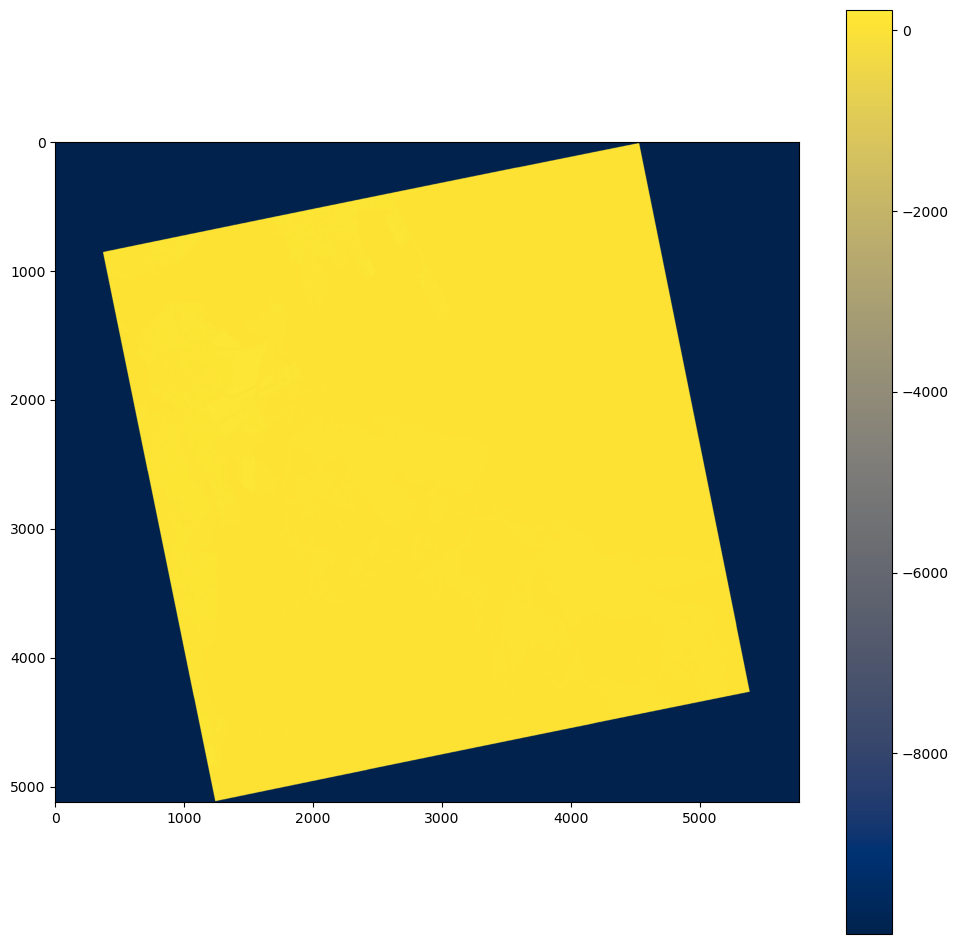

In [6]:
plt.figure(figsize=(12, 12))
plt.imshow(bands_data[3], cmap='cividis')
plt.colorbar()
plt.show()

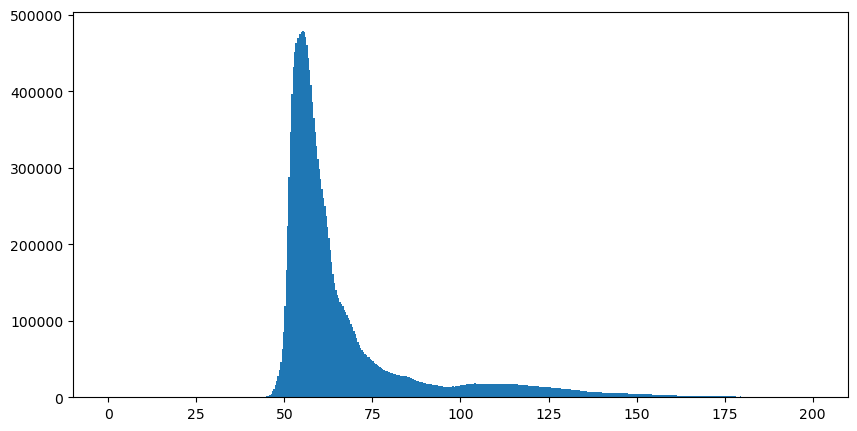

In [7]:
plt.figure(figsize=[10,5])
plt.hist(bands_data[3].flatten(), bins=256*2,range= [0,200])
plt.show()


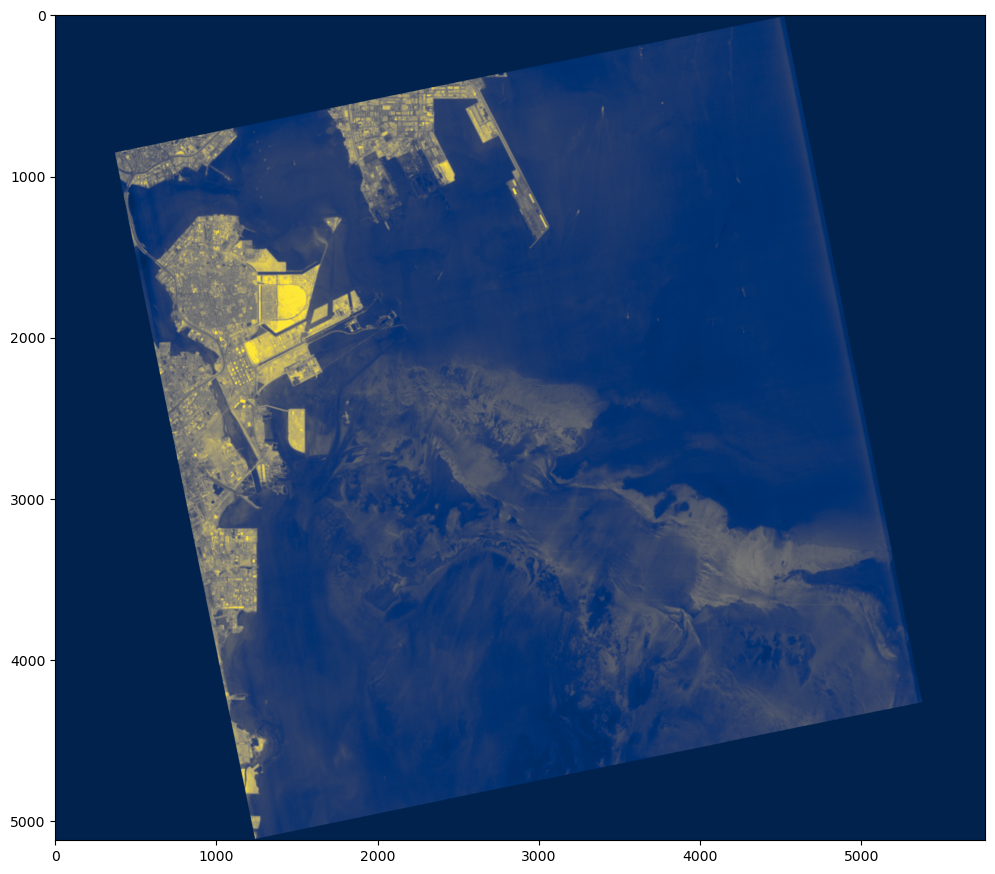

In [8]:
plt.figure(figsize=[12,12])
plt.imshow(bands_data[3], vmin=40, vmax=180,cmap = 'cividis')

(1500, 1500)


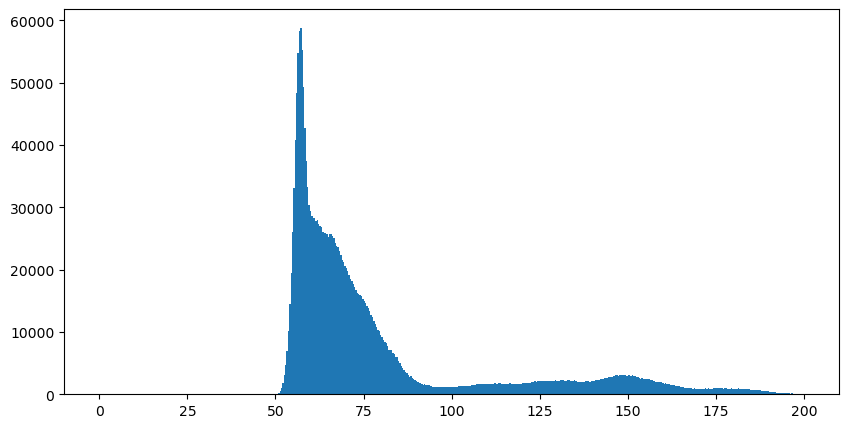

In [9]:
band_3_cropped = bands_data[3][1500:3000,1200:2700].copy()
plt.figure(figsize=[10,5])
plt.hist(band_3_cropped.flatten(), bins=256*2,range= [0,200])
print(band_3_cropped.shape)
plt.show()

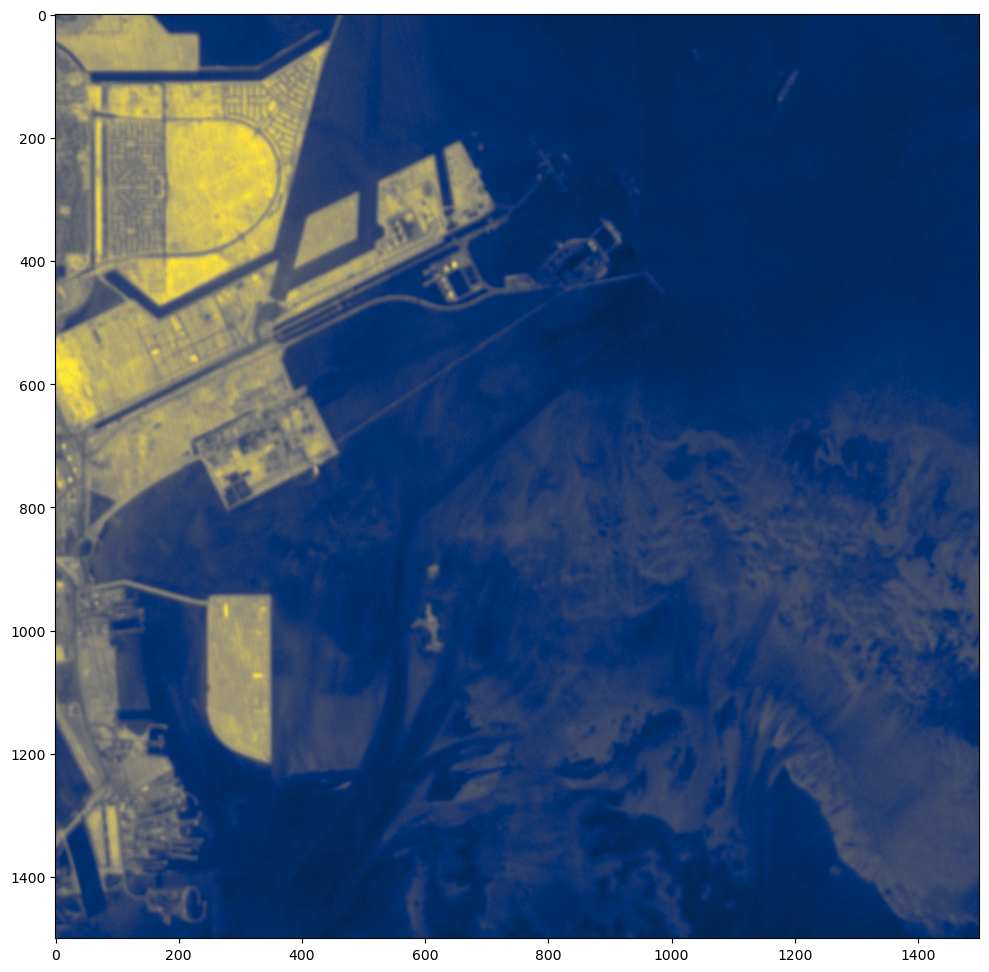

In [10]:
plt.figure(figsize=(12, 12))
plt.imshow(band_3_cropped, vmin=50, vmax=200,cmap = 'cividis')
plt.show()

In [11]:
bands_data_cropped = bands_data[:,1500:3000,1200:2700].copy()
bands_data_cropped.shape

(23, 1500, 1500)

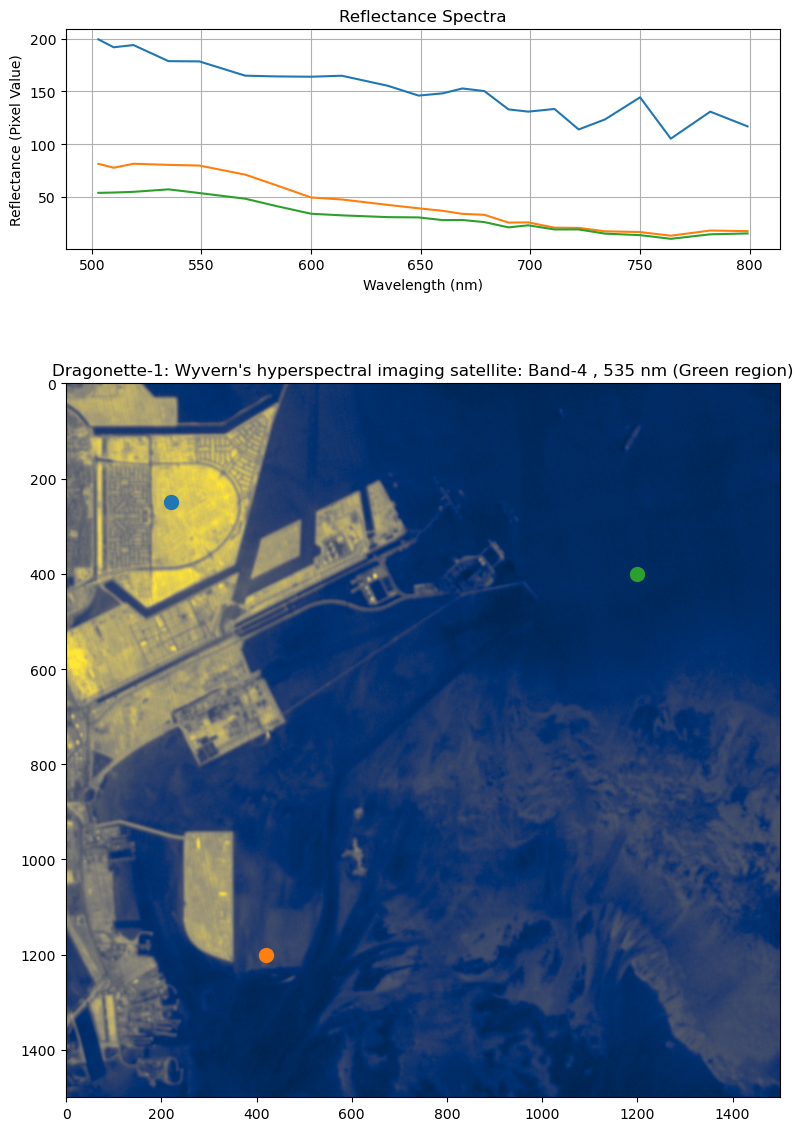

In [19]:
pixel_coords = [
    (250, 220),
    (1200, 420),
    (400, 1200),
]

wavelengths = np.array([503, 510, 519, 535, 549, 570, 584, 600, 614, 635,
                        649, 660, 669, 679, 690, 699, 711, 722, 734, 750,
                        764, 782, 799])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12), gridspec_kw={'height_ratios': [1, 4]})

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for idx, (y, x) in enumerate(pixel_coords):
    color = colors[idx % len(colors)]
    pixel_values = bands_data_cropped[:, y, x]
    ax1.plot(wavelengths, pixel_values, label=f'Pixel {idx+1} ({x},{y})', color=color)

ax1.set_xlabel("Wavelength (nm)")
ax1.set_ylabel("Reflectance (Pixel Value)")
ax1.set_title("Reflectance Spectra")
ax1.grid(True)

ax2.imshow(bands_data_cropped[3], vmin=50, vmax=200,cmap = 'cividis')
ax2.set_title("Dragonette-1: Wyvern's hyperspectral imaging satellite: Band-4 , 535 nm (Green region)")

for idx, (y, x) in enumerate(pixel_coords):
    color = colors[idx % len(colors)]
    ax2.plot(x, y, marker='o', markersize=10, markerfacecolor=color)

plt.tight_layout()
plt.savefig("spectra_and_image.png", dpi=400, bbox_inches='tight') 
plt.show()